In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip



--2024-06-27 10:00:34--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.91, 18.165.83.44, 18.165.83.79, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   240MB/s    in 2.7s    

2024-06-27 10:00:37 (240 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

In [ ]:
!pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=257bb33ab3f65940a10bed237b9b85b7ffb682e9935fb04f59e0a6a5dad6e41e
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import pandas as pd
import nltk


In [ ]:
import zipfile
from gensim.models import KeyedVectors
!unzip /content/wiki-news-300d-1M.vec.zip

# head is a terminal command to show you a few lines of the file.
!head /content/wiki-news-300d-1M.vec.zip

Archive:  /content/wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   
I��kО!j,d��\h_���i?�U��X���w��Ζ�|�Ԗ]1.�^זO`���'os�esJwC蒃��l���a��M���X\��o���&��q.�d6u�Z_�bv-�ۚ�`�Z��tR�>�]���_}�K{���</���Y�9,98������Q���2�^�49bɫHKZ�o�� ��f0ʝ,�P���9�z�?�bFN�ѓX��U��d��9���Z�Y�W.u�*ʛ^u�S���/>��h�2+�r$��u�`��L�n�z�ܕ��祰�y�+�!)�ךLh�l$jYr��n���:��y�_t��lR
00���|h7��]��������q��B��!�֑��4�әp~e�S|��sd߷�N�H�� @�x1�d.QFcؙT��}����X�CU�:�.+'�� &�yp�/�%�埅-�gFLH�Ou���z�~������@̪쫸�#t��4�P
�G�����q��gH$[�;�Q\q��x��-�p�t=A����06��%ˡ?�ߴ���u��y��\ �3��p�J0���V�I��V���#&�mhrE�n9M��+�nǽ���)�vƾ��Jk;;�廐n���'p!�����\��/PF�.�7w��޷��y�k�S+-��4���$�˹Ye�d�w�w������ �r5���9��ɑX#�,B�4@ϼ�_�&�n�GUe"�^]������z��$h)��%ظ���([� ܃;����ߒ�=�>	躾@F�}}>���l��n�z�K���ו����x-
:G��a��V}�*�e�;�sR�#��*��`��%Ҡ�$�K7��v5}S�� ���la�ϭb�$Ҝ!�����?o���E�ȋ?y�&(վ�\�z~��/��]� <l�f��y[�QAƺ��#]~���1-��bۖ�H����
��H��ZfŔ��,���F'�7uǨg��%kt�ƽ|0�^��C��S(�X�_ ��:m>r@

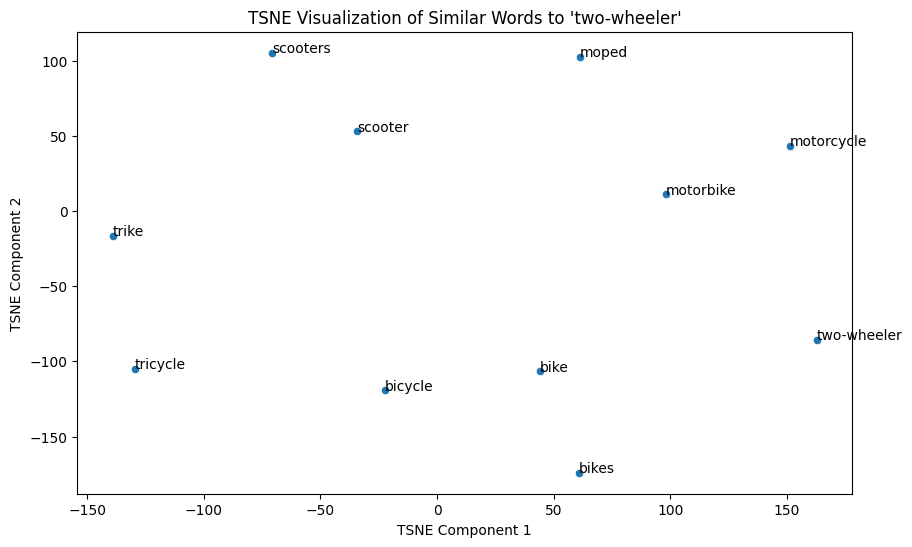

In [ ]:

# Path to your extracted .vec file containing word vectors
extracted_file_path = '/content/wiki-news-300d-1M.vec'

# Load the word vectors from the extracted file
model = KeyedVectors.load_word2vec_format(extracted_file_path)

# Function to plot similar words using TSNE
def plot_similar_words(word, model):
    similar_words = model.most_similar(word, topn=10)
    words = [word] + [w[0] for w in similar_words]
    word_vectors = np.array([model[w] for w in words])

    tsne = TSNE(n_components=2, perplexity=5)  # Set perplexity to a smaller value
    word_embeddings_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=word_embeddings_2d[:, 0], y=word_embeddings_2d[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

    plt.title(f"TSNE Visualization of Similar Words to '{word}'")
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.show()

# Example usage
plot_similar_words('scooter', model)